In [425]:
import pandas as pd
from dateutil.relativedelta import relativedelta
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../script/')
import palade #palade.plotでパレード図を描画
%matplotlib inline

In [22]:
air_reserve = pd.read_csv("../data/train_air_reserve.csv")

In [23]:
air_visit = pd.read_csv("../data/train_air_visit.csv")

In [24]:
air_reserve["reserve_datetime"] = pd.to_datetime(air_reserve["reserve_datetime"])

In [25]:
air_reserve.head(2)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3


In [272]:
air_reserve

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,reserve_year,reserve_month,reserve_day,reserve_ymd,reserve_ym,visit_weekday,reserve_time,visit_time
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016,1,1,2016-01-01,2016-01-01,Friday,16:00:00,16:00:00
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016,1,1,2016-01-01,2016-01-01,Friday,19:00:00,19:00:00
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016,1,1,2016-01-01,2016-01-01,Friday,19:00:00,19:00:00
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016,1,1,2016-01-01,2016-01-01,Friday,16:00:00,16:00:00
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016,1,1,2016-01-01,2016-01-01,Friday,01:00:00,01:00:00
5,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 16:00:00,2,2016,1,1,2016-01-01,2016-01-01,Saturday,16:00:00,16:00:00
6,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 15:00:00,4,2016,1,1,2016-01-01,2016-01-01,Saturday,15:00:00,15:00:00
7,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-02 14:00:00,2,2016,1,2,2016-01-02,2016-01-01,Saturday,14:00:00,14:00:00
8,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-01 20:00:00,2,2016,1,1,2016-01-01,2016-01-01,Saturday,20:00:00,20:00:00
9,air_2b8b29ddfd35018e,2016-01-02 17:00:00,2016-01-02 17:00:00,2,2016,1,2,2016-01-02,2016-01-01,Saturday,17:00:00,17:00:00


In [26]:
air_visit.head(2)

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32


In [240]:
air_reserve["reserve_year"] = air_reserve["reserve_datetime"].dt.year
air_reserve["reserve_month"] = air_reserve["reserve_datetime"].dt.month
air_reserve["reserve_day"] = air_reserve["reserve_datetime"].dt.day
air_reserve["reserve_time"] = air_reserve["reserve_datetime"].dt.time
air_reserve["reserve_ymd"] = air_reserve["reserve_year"].astype(str)+"-"+air_reserve["reserve_month"].astype(str)+"-"+air_reserve["reserve_day"].astype(str)
air_reserve["reserve_ymd"] = pd.to_datetime(air_reserve["reserve_ymd"])
air_reserve["reserve_ym"] = air_reserve["reserve_year"].astype(str)+"-"+air_reserve["reserve_month"].astype(str)
air_reserve["reserve_ym"] = pd.to_datetime(air_reserve["reserve_ym"])

In [273]:
air_reserve["visit_year"] = air_reserve["visit_datetime"].dt.year
air_reserve["visit_month"] = air_reserve["visit_datetime"].dt.month
air_reserve["visit_day"] = air_reserve["visit_datetime"].dt.day
air_reserve["visit_time"] = air_reserve["visit_datetime"].dt.time
air_reserve["visit_ymd"] = air_reserve["visit_year"].astype(str)+"-"+air_reserve["visit_month"].astype(str)+"-"+air_reserve["visit_day"].astype(str)
air_reserve["visit_ymd"] = pd.to_datetime(air_reserve["visit_ymd"])
air_reserve["visit_ym"] = air_reserve["visit_year"].astype(str)+"-"+air_reserve["visit_month"].astype(str)
air_reserve["visit_ym"] = pd.to_datetime(air_reserve["visit_ym"])

In [268]:
air_visit["visit_year"] = air_visit["visit_date"].dt.year
air_visit["visit_month"] = air_visit["visit_date"].dt.month
air_visit["visit_day"] = air_visit["visit_date"].dt.day
air_visit["visit_time"] = air_visit["visit_date"].dt.time
air_visit["visit_ymd"] = air_visit["visit_year"].astype(str)+"-"+air_visit["visit_month"].astype(str)+"-"+air_visit["visit_day"].astype(str)
air_visit["visit_ymd"] = pd.to_datetime(air_visit["visit_ymd"])
air_visit["visit_ym"] = air_visit["visit_year"].astype(str)+"-"+air_visit["visit_month"].astype(str)
air_visit["visit_ym"] = pd.to_datetime(air_visit["visit_ym"])

In [28]:
air_reserve["visit_datetime"] = pd.to_datetime(air_reserve["visit_datetime"])

In [29]:
air_reserve["visit_weekday"] = air_reserve["visit_datetime"].dt.weekday_name

In [30]:
air_reserve

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,reserve_year,reserve_month,reserve_day,reserve_ymd,reserve_ym,visit_weekday
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016,1,1,2016-01-01,2016-01-01,Friday
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016,1,1,2016-01-01,2016-01-01,Friday
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016,1,1,2016-01-01,2016-01-01,Friday
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016,1,1,2016-01-01,2016-01-01,Friday
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016,1,1,2016-01-01,2016-01-01,Friday
5,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 16:00:00,2,2016,1,1,2016-01-01,2016-01-01,Saturday
6,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 15:00:00,4,2016,1,1,2016-01-01,2016-01-01,Saturday
7,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-02 14:00:00,2,2016,1,2,2016-01-02,2016-01-01,Saturday
8,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-01 20:00:00,2,2016,1,1,2016-01-01,2016-01-01,Saturday
9,air_2b8b29ddfd35018e,2016-01-02 17:00:00,2016-01-02 17:00:00,2,2016,1,2,2016-01-02,2016-01-01,Saturday


### 予約平均回数  
予約回数 / 集計期間

In [566]:
reserve_counts_mean= pd.DataFrame(air_reserve.groupby("air_store_id")["visit_datetime"].count()/439)

In [571]:
reserve_counts_mean = reserve_counts_mean.rename(columns= {"visit_datetime":"mean"})

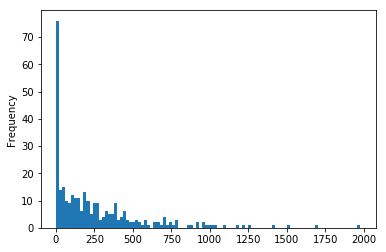

In [33]:
air_reserve.groupby("air_store_id")["visit_datetime"].count().plot.hist(bins=100)

### 予約人数の最頻値

In [34]:
air_reserve.groupby(["air_store_id","visit_weekday"])["visit_datetime"].count()

air_store_id          visit_weekday
air_00a91d42b08b08d9  Monday             2
                      Saturday           2
                      Thursday           1
                      Tuesday            2
                      Wednesday          2
air_0164b9927d20bcc3  Friday            26
                      Monday            27
                      Saturday           4
                      Thursday          23
                      Tuesday           24
                      Wednesday         19
air_034a3d5b40d5b1b1  Friday             2
                      Saturday           5
                      Sunday             4
                      Thursday           1
                      Tuesday            1
                      Wednesday          1
air_03963426c9312048  Friday           293
                      Monday            80
                      Saturday         297
                      Sunday            54
                      Thursday         144
                  

In [35]:
air_reserve.groupby(["air_store_id","reserve_ymd"])["reserve_visitors"].sum()

air_store_id          reserve_ymd
air_00a91d42b08b08d9  2016-10-31      2
                      2016-12-01      9
                      2016-12-08     18
                      2016-12-11      2
                      2016-12-18      4
                      2017-02-13      9
                      2017-02-18      3
                      2017-02-21     12
                      2017-03-14      4
air_0164b9927d20bcc3  2016-10-14      2
                      2016-10-18     10
                      2016-10-19      4
                      2016-10-20      2
                      2016-10-21      2
                      2016-10-25     10
                      2016-10-28      4
                      2016-10-29     12
                      2016-10-31     15
                      2016-11-02      3
                      2016-11-05     12
                      2016-11-08      2
                      2016-11-09      2
                      2016-11-10      2
                      2016-11-11      5
      

In [125]:
temp = air_reserve.groupby(["air_store_id","reserve_visitors"])["visit_datetime"].count()

In [68]:
reserve_visitor_mode = pd.concat([pd.Series([element for tupl in temp.groupby("air_store_id").idxmax().values for element in tupl[0::2]]),
          pd.Series([element for tupl in temp.groupby("air_store_id").idxmax().values for element in tupl[1::2]])],axis=1)

reserve_visitor_mode = reserve_visitor_mode.rename(columns={0:"air_store_id",1:"mode"})

In [69]:
reserve_visitor_mode

,air_store_id,mode
0,air_00a91d42b08b08d9,2
1,air_0164b9927d20bcc3,2
2,air_034a3d5b40d5b1b1,2
3,air_03963426c9312048,2
4,air_04341b588bde96cd,10
5,air_04cae7c1bc9b2a0b,2
6,air_066f0221b8a4d533,2
7,air_06f95ac5c33aca10,8
8,air_082908692355165e,2
9,air_084d98859256acf0,2


### 平均訪問者数

In [298]:
visit_visitors_mean = air_visit.groupby("air_store_id")["visitors"].mean()

In [303]:
visit_visitors_mean = pd.DataFrame(visit_visitors_mean).rename(columns={"visitors":"visitors_mean"})

### 営業時間  

訪問予定時間の最大、最小?
予約

In [262]:
air_visit["visit_date"] = pd.to_datetime(air_visit["visit_date"])

In [557]:
air_reserve["visit_time"] = air_reserve["visit_time"].astype(str).str[:2]

In [558]:
temp = air_reserve[["air_store_id","visit_time","visit_datetime"]].groupby(["air_store_id","visit_time"]).count()

In [559]:
temp.head(2)

visit_datetime
air_store_id         visit_time                
air_00a91d42b08b08d9 18                       1
                     19                       5

In [560]:
business_time = np.logical_not(pd.pivot_table(temp,index="air_store_id",columns="visit_time").isnull())*1

In [779]:
business_time.head()

visit_datetime                            ...           \
visit_time                       00 01 02 03 04 05 06 07 08 09 ... 14 15 16   
air_store_id                                                   ...            
air_00a91d42b08b08d9              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_0164b9927d20bcc3              1  1  0  0  0  0  0  0  0  0 ...  0  0  0   
air_034a3d5b40d5b1b1              0  0  0  0  0  0  0  0  0  0 ...  0  1  1   
air_03963426c9312048              0  0  0  0  0  0  0  0  0  0 ...  1  1  1   
air_04341b588bde96cd              1  0  0  0  0  0  0  0  0  0 ...  0  1  0   

                                           
visit_time           17 18 19 20 21 22 23  
air_store_id                               
air_00a91d42b08b08d9  0  1  1  1  0  0  0  
air_0164b9927d20bcc3  1  1  1  1  1  1  1  
air_034a3d5b40d5b1b1  1  1  1  1  0  0  1  
air_03963426c9312048  1  1  1  1  1  1  1  
air_04341b588bde96cd  0  1  1  1  1  1  0  

[5 rows x 24 columns]

In [780]:
business_time.columns = business_time.columns.levels[1]

In [561]:
air_reserve["visit_time"] = air_reserve["visit_datetime"].dt.time

In [144]:
visit_start_time = pd.DataFrame(air_reserve.groupby("air_store_id")["visit_time"].min())
visit_start_time = visit_start_time.rename(columns={"visit_time":"start_time"})

In [145]:
visit_end_time = pd.DataFrame(air_reserve.groupby("air_store_id")["visit_time"].max())
visit_end_time = visit_end_time.rename(columns={"visit_time":"end_time"})

### 席数(最大同時予約人数?)
暫定 : 同じ時間に訪問する予定人数で最大を取得

In [127]:
temp = air_reserve.groupby(["air_store_id","visit_datetime"])["reserve_visitors"].sum()

In [117]:
temp.head(2)

air_store_id          visit_datetime     
air_00a91d42b08b08d9  2016-10-31 20:00:00    2
                      2016-12-05 19:00:00    9
Name: reserve_visitors, dtype: int64

In [124]:
temp.values

array([ 2,  9, 18, ...,  8,  2,  5])

In [137]:
reserve_seats = pd.DataFrame(temp.groupby("air_store_id").max())
reserve_seats = reserve_seats.rename(columns={"reserve_visitors":"seats"})

### 回転率

一日の来客数 /　席数

In [229]:
reserve_seats#["air_store_id"]

,seats
air_store_id,
air_00a91d42b08b08d9,18
air_0164b9927d20bcc3,16
air_034a3d5b40d5b1b1,50
air_03963426c9312048,78
air_04341b588bde96cd,37
air_04cae7c1bc9b2a0b,26
air_066f0221b8a4d533,18
air_06f95ac5c33aca10,18
air_082908692355165e,29


In [628]:
rotational_speed  = pd.merge(air_visit,reserve_seats,left_on="air_store_id",right_index=True)
rotational_speed["rot_speed"] = rotational_speed["visitors"]/rotational_speed["seats"]

### 予約率の算出

#### 1日の予約人数合計

In [275]:
pd.DataFrame(air_reserve.groupby(["air_store_id","visit_ymd"])["reserve_visitors"].sum()).reset_index().tail(2)

,air_store_id,visit_ymd,reserve_visitors
24882,air_fea5dc9594450608,2017-03-29,2
24883,air_fee8dcf4d619598e,2017-01-09,5


In [290]:
reserve_visit_diff = pd.merge(pd.DataFrame(air_reserve.groupby(["air_store_id","visit_ymd"])["reserve_visitors"].sum()).reset_index(),air_visit,left_on=["air_store_id","visit_ymd"],right_on=["air_store_id","visit_date"] )[["air_store_id","visit_date","visitors","reserve_visitors"]]

In [287]:
reserve_visit_diff["reserve_rat"] = reserve_visit_diff["reserve_visitors"]/reserve_visit_diff["visitors"]

In [291]:
reserve_visit_diff["reserve_diff"] = reserve_visit_diff["visitors"] - reserve_visit_diff["reserve_visitors"]

### genre

In [306]:
raw_air_store_info = pd.read_csv('../data/air_store_info.csv', engine='python', encoding='UTF-8')

In [323]:
raw_air_store_info.groupby(["air_area_name","air_genre_name"])["air_store_id"].count().reset_index().head(9)

,air_area_name,air_genre_name,air_store_id
0,Fukuoka-ken Fukuoka-shi Daimyō,Bar/Cocktail,7
1,Fukuoka-ken Fukuoka-shi Daimyō,Cafe/Sweets,26
2,Fukuoka-ken Fukuoka-shi Daimyō,Creative cuisine,2
3,Fukuoka-ken Fukuoka-shi Daimyō,Dining bar,5
4,Fukuoka-ken Fukuoka-shi Daimyō,Italian/French,9
5,Fukuoka-ken Fukuoka-shi Daimyō,Izakaya,6
6,Fukuoka-ken Fukuoka-shi Daimyō,Japanese food,3
7,Fukuoka-ken Fukuoka-shi Daimyō,Other,3
8,Fukuoka-ken Fukuoka-shi Daimyō,Yakiniku/Korean food,3


In [341]:
genre_rank_in_area = raw_air_store_info.groupby(["air_area_name","air_genre_name"])["air_store_id"].count().groupby("air_area_name").rank().reset_index().rename(columns={"air_store_id":"rank"})

In [378]:
raw_air_store_info.groupby(["air_area_name","air_genre_name"])["air_store_id"].count()#.reset_index(name="count").sort_values(["count"],ascending=False)#.head(9)

air_area_name                          air_genre_name              
Fukuoka-ken Fukuoka-shi Daimyō         Bar/Cocktail                     7
                                       Cafe/Sweets                     26
                                       Creative cuisine                 2
                                       Dining bar                       5
                                       Italian/French                   9
                                       Izakaya                          6
                                       Japanese food                    3
                                       Other                            3
                                       Yakiniku/Korean food             3
Fukuoka-ken Fukuoka-shi Hakata Ekimae  Bar/Cocktail                     2
                                       Italian/French                   2
                                       Izakaya                          8
                                       Japan

In [396]:
a = raw_air_store_info.groupby("air_area_name")["air_genre_name"].value_counts().reset_index(name="genre_count")

In [401]:
b = raw_air_store_info.groupby("air_area_name")["air_genre_name"].count().reset_index(name = "genre_all_count")

In [402]:
b

,air_area_name,genre_all_count
0,Fukuoka-ken Fukuoka-shi Daimyō,64
1,Fukuoka-ken Fukuoka-shi Hakata Ekimae,16
2,Fukuoka-ken Fukuoka-shi Imaizumi,2
3,Fukuoka-ken Fukuoka-shi Momochi,6
4,Fukuoka-ken Fukuoka-shi Shiobaru,7
5,Fukuoka-ken Fukuoka-shi Takatori,2
6,Fukuoka-ken Fukuoka-shi Tenjin,2
7,Fukuoka-ken Fukuoka-shi Torikai,4
8,Fukuoka-ken Itoshima-shi Maebarunishi,7
9,Fukuoka-ken Kitakyūshū-shi Konyamachi,2


In [709]:
genre_freq_in_area = pd.merge(a,b)
genre_freq_in_area["genre_freq_in_area"] = genre_freq_in_area["genre_count"]/genre_freq_in_area["genre_all_count"]

### n日前の訪問人数

In [700]:
test = air_visit

In [701]:
test["diff1"] = test["visit_date"] + datetime.timedelta(days=1)

In [703]:
diff1_visitors = pd.merge(air_visit, test[["air_store_id","visitors","diff1"]], left_on=["air_store_id","visit_date"], right_on=["air_store_id","diff1"] )

In [704]:
diff1_visitors = diff1_visitors.rename(columns={"visitors_x":"visitors","visitors_y":"diff1_visitors"})[["air_store_id","visit_date","diff1_visitors"]]

In [705]:
diff1_visitors["visit_date"] = pd.to_datetime(diff1_visitors["visit_date"])

In [706]:
diff1_visitors

,air_store_id,visit_date,diff1_visitors
0,air_ba937bf13d40fb24,2016-01-14,25
1,air_ba937bf13d40fb24,2016-01-15,32
2,air_ba937bf13d40fb24,2016-01-16,29
3,air_ba937bf13d40fb24,2016-01-19,6
4,air_ba937bf13d40fb24,2016-01-20,9
5,air_ba937bf13d40fb24,2016-01-21,31
6,air_ba937bf13d40fb24,2016-01-22,21
7,air_ba937bf13d40fb24,2016-01-23,18
8,air_ba937bf13d40fb24,2016-01-26,21
9,air_ba937bf13d40fb24,2016-01-27,11


In [667]:
air_visit["visit_date"][0]

Timestamp('2016-01-13 00:00:00')

genreとjoin

In [167]:
temp = pd.DataFrame(air_reserve["air_store_id"].unique())
temp = temp.rename(columns={0:"air_store_id"})

In [171]:
reserve_true_store_list = pd.merge(temp,raw_air_store_info)

/Users/ryo_ozaki/miniconda3/envs/python-basics/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


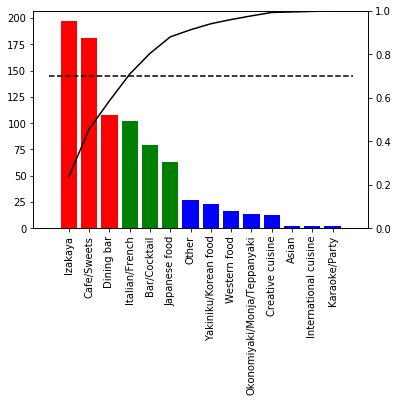

In [180]:
palade.count_plot(raw_air_store_info,"air_genre_name",rotation=90,ABC=True,x_numbers=14,hline_cum=0.7)

#### genreによって予約可能店舗数に違いがあるかチェック

In [221]:
a = raw_air_store_info["air_genre_name"].value_counts().sort_index()
b = reserve_true_store_list["air_genre_name"].value_counts().sort_index()
pd.concat([a,b,(a-b)/a],axis=1)

,air_genre_name,air_genre_name,air_genre_name
Asian,2,1,0.500000
Bar/Cocktail,79,14,0.822785
Cafe/Sweets,181,19,0.895028
Creative cuisine,13,3,0.769231
Dining bar,108,45,0.583333
International cuisine,2,1,0.500000
Italian/French,102,55,0.460784
Izakaya,197,106,0.461929
Japanese food,63,27,0.571429
Karaoke/Party,2,1,0.500000


In [198]:
air_reserve.groupby

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,reserve_year,reserve_month,reserve_day,reserve_ymd,reserve_ym,visit_weekday,reserve_time,visit_time
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016,1,1,2016-01-01,2016-01-01,Friday,16:00:00,16:00:00
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016,1,1,2016-01-01,2016-01-01,Friday,19:00:00,19:00:00
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016,1,1,2016-01-01,2016-01-01,Friday,19:00:00,19:00:00
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016,1,1,2016-01-01,2016-01-01,Friday,16:00:00,16:00:00
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016,1,1,2016-01-01,2016-01-01,Friday,01:00:00,01:00:00
5,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 16:00:00,2,2016,1,1,2016-01-01,2016-01-01,Saturday,16:00:00,16:00:00
6,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 15:00:00,4,2016,1,1,2016-01-01,2016-01-01,Saturday,15:00:00,15:00:00
7,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-02 14:00:00,2,2016,1,2,2016-01-02,2016-01-01,Saturday,14:00:00,14:00:00
8,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-01 20:00:00,2,2016,1,1,2016-01-01,2016-01-01,Saturday,20:00:00,20:00:00
9,air_2b8b29ddfd35018e,2016-01-02 17:00:00,2016-01-02 17:00:00,2,2016,1,2,2016-01-02,2016-01-01,Saturday,17:00:00,17:00:00


#### 2016-07-01前は316店舗分のデータしか存在しない

In [214]:
air_visit[air_visit["visit_date"] < "2016-07-01"].describe(include="all")

,air_store_id,visit_date,visitors
count,47699,47699,47699.000000
unique,316,182,NaN
top,air_d97dabf7aae60da5,2016-06-17,NaN
freq,182,304,NaN
mean,NaN,NaN,21.800499
std,NaN,NaN,17.086586
min,NaN,NaN,1.000000
25%,NaN,NaN,9.000000
50%,NaN,NaN,18.000000
75%,NaN,NaN,30.000000


In [211]:
air_visit.describe(include= "all")

,air_store_id,visit_date,visitors
count,224077,224077,224077.000000
unique,829,439,NaN
top,air_a083834e7ffe187e,2017-03-03,NaN
freq,438,791,NaN
mean,NaN,NaN,20.823061
std,NaN,NaN,16.534754
min,NaN,NaN,1.000000
25%,NaN,NaN,9.000000
50%,NaN,NaN,17.000000
75%,NaN,NaN,29.000000


In [217]:
temp = pd.DataFrame(air_reserve["air_store_id"].unique())
temp2 = pd.DataFrame(air_visit[air_visit["visit_date"] < "2016-07-01"]["air_store_id"].unique())

In [218]:
pd.merge(temp,temp2)

,0
0,air_877f79706adbfb06
1,air_db4b38ebe7a7ceff
2,air_db80363d35f10926
3,air_3bb99a1fe0583897
4,air_2b8b29ddfd35018e
5,air_6b15edd1b4fbb96a
6,air_789466e488705c93
7,air_f690c42545146e0a
8,air_326ca454ef3558bc
9,air_6c91a28278a16f64


/Users/ryo_ozaki/miniconda3/envs/python-basics/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


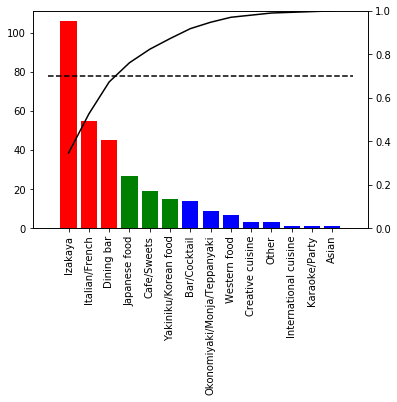

In [181]:
palade.count_plot(reserve_true_store_list,"air_genre_name",rotation=90,ABC=True,x_numbers=14,hline_cum=0.7)

In [161]:
pd.merge(air_reserve,raw_air_store_info,on="air_store_id")#["air_genre_name"].unique()#.groupby("air_store_id").count()#["air_genre_name"]

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,reserve_year,reserve_month,reserve_day,reserve_ymd,reserve_ym,visit_weekday,reserve_time,visit_time,air_genre_name,air_area_name,latitude,longitude
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016,1,1,2016-01-01,2016-01-01,Friday,16:00:00,16:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016,1,1,2016-01-01,2016-01-01,Friday,16:00:00,16:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,2016,1,1,2016-01-01,2016-01-01,Saturday,16:00:00,16:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_877f79706adbfb06,2016-01-02 21:00:00,2016-01-01 16:00:00,2,2016,1,1,2016-01-01,2016-01-01,Saturday,16:00:00,16:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-04 20:00:00,2,2016,1,4,2016-01-04,2016-01-01,Friday,20:00:00,20:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
5,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-08 21:00:00,2,2016,1,8,2016-01-08,2016-01-01,Friday,21:00:00,21:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
6,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-05 13:00:00,3,2016,1,5,2016-01-05,2016-01-01,Friday,13:00:00,13:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
7,air_877f79706adbfb06,2016-01-09 20:00:00,2016-01-06 23:00:00,2,2016,1,6,2016-01-06,2016-01-01,Saturday,23:00:00,23:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
8,air_877f79706adbfb06,2016-01-09 21:00:00,2016-01-09 21:00:00,4,2016,1,9,2016-01-09,2016-01-01,Saturday,21:00:00,21:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
9,air_877f79706adbfb06,2016-01-09 22:00:00,2016-01-05 12:00:00,2,2016,1,5,2016-01-05,2016-01-01,Saturday,12:00:00,12:00:00,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [562]:
business_time

visit_datetime                            ...           \
visit_time                       00 01 02 03 04 05 06 07 08 09 ... 14 15 16   
air_store_id                                                   ...            
air_00a91d42b08b08d9              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_0164b9927d20bcc3              1  1  0  0  0  0  0  0  0  0 ...  0  0  0   
air_034a3d5b40d5b1b1              0  0  0  0  0  0  0  0  0  0 ...  0  1  1   
air_03963426c9312048              0  0  0  0  0  0  0  0  0  0 ...  1  1  1   
air_04341b588bde96cd              1  0  0  0  0  0  0  0  0  0 ...  0  1  0   
air_04cae7c1bc9b2a0b              1  0  0  0  0  0  0  0  0  0 ...  0  0  1   
air_066f0221b8a4d533              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_06f95ac5c33aca10              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_082908692355165e              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_084d98859256acf0              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_0867f7bebad6a649              0  0  0  0  0  0  0  0  0  0 ...  1  1  1   
air_08cb3c4ee6cd6a22              1  0  1  0  0  0  0  0  0  0 ...  0  0  0   
air_08ef81d5b7a0d13f              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_0a74a5408a0b8642              1  0  0  0  0  0  0  0  0  0 ...  1  0  1   
air_0b184ec04c741a6a              1  1  1  1  1  0  0  0  0  0 ...  1  1  1   
air_0b1e72d2d4422b20              1  1  1  1  1  0  0  0  0  0 ...  0  0  0   
air_0e1eae99b8723bc1              0  0  0  1  0  0  0  0  0  0 ...  1  1  1   
air_0f0cdeee6c9bf3d7              1  1  0  0  0  0  0  0  0  0 ...  1  1  1   
air_1033310359ceeac1              1  1  1  1  1  1  1  1  1  0 ...  0  0  1   
air_10bbe8acd943d8f6              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_12c4fb7a423df20d              0  0  0  0  0  0  0  0  0  0 ...  1  1  1   
air_138ff410757b845f              0  0  0  0  0  0  0  0  0  0 ...  0  1  0   
air_1408dd53f31a8a65              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_142e78ba7001da9c              0  0  0  0  0  0  0  0  0  0 ...  1  0  0   
air_15ae33469e9ea2dd              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_1653a6c513865af3              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_1707a3f18bb0da07              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_1ba4e87ef7422183              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_1c0b150f9e696a5f              0  0  0  0  0  0  0  0  0  0 ...  1  1  1   
air_1d1e8860ae04f8e9              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
...                             ... .. .. .. .. .. .. .. .. .. ... .. .. ..   
air_e270aff84ac7e4c8              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_e524c6a9e06cc3a1              1  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_e55abd740f93ecc4              0  0  0  0  0  0  0  0  0  0 ...  0  0  1   
air_e5cf003abcc5febb              0  0  0  0  0  0  0  0  0  0 ...  0  0  1   
air_e657ca554b0c008c              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_e7fbee4e3cfe65c5              1  0  0  0  0  0  0  0  0  0 ...  1  0  1   
air_e89735e80d614a7e              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_eca4a5a191e8d993              0  0  0  0  0  0  0  0  0  0 ...  0  0  1   
air_ecf7f141339f1d57              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_edd5e3d696a5811b              0  0  0  0  0  0  0  0  0  0 ...  0  0  1   
air_ee3a01f0c71a769f              0  0  0  0  0  0  0  0  0  0 ...  1  1  1   
air_ee3ba9af184c6c82              1  0  0  1  0  0  0  0  0  0 ...  1  0  0   
air_eec5e572b9eb9c23              1  1  0  1  0  0  0  0  0  0 ...  0  0  0   
air_ef789667e2e6fe96              1  0  0  0  0  0  0  0  0  0 ...  0  0  1   
air_f068442ebb6c246c              0  0  0  0  0  0  0  0  1  0 ...  0  1  1   
air_f180301886c21375              1  0  1  0  0  0  0  0  0  0 ...  0  0  1   
air_f2c5a1f24279c531              0  0  0  0  0  0  0  0  0  0 ...  0  

In [478]:
print(visit_start_time.shape)
visit_start_time.tail(2)

(306, 1)


,start_time
air_store_id,
air_fea5dc9594450608,00:00:00
air_fee8dcf4d619598e,14:00:00


In [479]:
print(visit_end_time.shape)
visit_end_time.tail(2)

(306, 1)


,end_time
air_store_id,
air_fea5dc9594450608,23:00:00
air_fee8dcf4d619598e,16:00:00


In [568]:
print(reserve_counts_mean.shape)
reserve_counts_mean.tail(2)

(306, 1)


,visit_datetime
air_store_id,
air_fea5dc9594450608,0.248292
air_fee8dcf4d619598e,0.004556


/Users/ryo_ozaki/miniconda3/envs/python-basics/lib/python3.6/site-packages/pandas/core/reshape/merge.py:558: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [80]:
reserve_visitor_mode.tail(2)

,air_store_id,mode
304,air_fea5dc9594450608,2
305,air_fee8dcf4d619598e,2


In [220]:
reserve_seats.tail(2)

,seats
air_store_id,
air_fea5dc9594450608,13
air_fee8dcf4d619598e,5


In [630]:
rotational_speed

,air_store_id,visit_date,visitors,visit_year,visit_month,visit_day,visit_time,visit_ymd,visit_ym,seats,rot_speed
905,air_35512c42db0868da,2016-02-25,2,2016,2,25,00:00:00,2016-02-25,2016-02-01,12,0.166667
906,air_35512c42db0868da,2016-02-26,13,2016,2,26,00:00:00,2016-02-26,2016-02-01,12,1.083333
907,air_35512c42db0868da,2016-02-27,6,2016,2,27,00:00:00,2016-02-27,2016-02-01,12,0.500000
908,air_35512c42db0868da,2016-02-28,30,2016,2,28,00:00:00,2016-02-28,2016-02-01,12,2.500000
909,air_35512c42db0868da,2016-02-29,11,2016,2,29,00:00:00,2016-02-29,2016-02-01,12,0.916667
910,air_35512c42db0868da,2016-03-01,17,2016,3,1,00:00:00,2016-03-01,2016-03-01,12,1.416667
911,air_35512c42db0868da,2016-03-02,7,2016,3,2,00:00:00,2016-03-02,2016-03-01,12,0.583333
912,air_35512c42db0868da,2016-03-03,14,2016,3,3,00:00:00,2016-03-03,2016-03-01,12,1.166667
913,air_35512c42db0868da,2016-03-04,10,2016,3,4,00:00:00,2016-03-04,2016-03-01,12,0.833333
914,air_35512c42db0868da,2016-03-05,17,2016,3,5,00:00:00,2016-03-05,2016-03-01,12,1.416667


In [696]:
rotational_speed[["air_store_id","visit_date","rot_speed"]].head(2)


,air_store_id,visit_date,rot_speed
905,air_35512c42db0868da,2016-02-25,0.166667
906,air_35512c42db0868da,2016-02-26,1.083333


In [622]:
reserve_visit_diff[["air_store_id","visit_date","reserve_visitors","reserve_diff"]].head()

,air_store_id,visit_date,reserve_visitors,reserve_diff
0,air_00a91d42b08b08d9,2016-10-31,2,24
1,air_00a91d42b08b08d9,2016-12-05,9,24
2,air_00a91d42b08b08d9,2016-12-14,18,12
3,air_00a91d42b08b08d9,2016-12-17,2,15
4,air_00a91d42b08b08d9,2016-12-20,4,33


In [632]:
rotational_speed[rotational_speed["visit_date"].isin(reserve_visit_diff["visit_date"])]

,air_store_id,visit_date,visitors,visit_year,visit_month,visit_day,visit_time,visit_ymd,visit_ym,seats,rot_speed
905,air_35512c42db0868da,2016-02-25,2,2016,2,25,00:00:00,2016-02-25,2016-02-01,12,0.166667
906,air_35512c42db0868da,2016-02-26,13,2016,2,26,00:00:00,2016-02-26,2016-02-01,12,1.083333
907,air_35512c42db0868da,2016-02-27,6,2016,2,27,00:00:00,2016-02-27,2016-02-01,12,0.500000
908,air_35512c42db0868da,2016-02-28,30,2016,2,28,00:00:00,2016-02-28,2016-02-01,12,2.500000
909,air_35512c42db0868da,2016-02-29,11,2016,2,29,00:00:00,2016-02-29,2016-02-01,12,0.916667
910,air_35512c42db0868da,2016-03-01,17,2016,3,1,00:00:00,2016-03-01,2016-03-01,12,1.416667
911,air_35512c42db0868da,2016-03-02,7,2016,3,2,00:00:00,2016-03-02,2016-03-01,12,0.583333
912,air_35512c42db0868da,2016-03-03,14,2016,3,3,00:00:00,2016-03-03,2016-03-01,12,1.166667
913,air_35512c42db0868da,2016-03-04,10,2016,3,4,00:00:00,2016-03-04,2016-03-01,12,0.833333
914,air_35512c42db0868da,2016-03-05,17,2016,3,5,00:00:00,2016-03-05,2016-03-01,12,1.416667


In [620]:
pd.merge(rotational_speed,reserve_visit_diff)

,air_store_id,visit_date,visitors,seats,rot_speed,reserve_visitors,reserve_diff


In [601]:
print(visit_visitors_mean.shape)
visit_visitors_mean.tail(2)

(829, 1)


,visitors_mean
air_store_id,
air_ffcc2d5087e1b476,20.086538
air_fff68b929994bfbd,5.165217


In [406]:
genre_rank_in_area.tail(2)

,air_area_name,air_genre_name,rank
242,Ōsaka-fu Ōsaka-shi Ōhiraki,Cafe/Sweets,1.5
243,Ōsaka-fu Ōsaka-shi Ōhiraki,Izakaya,1.5


In [710]:
genre_freq_in_area.tail(2)

,air_area_name,air_genre_name,genre_count,genre_all_count,genre_freq_in_area
242,Ōsaka-fu Ōsaka-shi Ōhiraki,Cafe/Sweets,2,4,0.5
243,Ōsaka-fu Ōsaka-shi Ōhiraki,Izakaya,2,4,0.5


In [713]:
temp = pd.merge(genre_freq_in_area,genre_rank_in_area,on=["air_area_name","air_genre_name"])

In [715]:
genre_data = pd.merge(raw_air_store_info,temp)

In [689]:
resume[resume["air_store_id"].isin(diff1_visitors["air_store_id"])]

,air_store_id,visit_date,rot_speed,mean,"(visit_datetime, 00)","(visit_datetime, 01)","(visit_datetime, 02)","(visit_datetime, 03)","(visit_datetime, 04)","(visit_datetime, 05)",...,"(visit_datetime, 19)","(visit_datetime, 20)","(visit_datetime, 21)","(visit_datetime, 22)","(visit_datetime, 23)",mode,seats,reserve_visitors,reserve_diff,visitors_mean


In [697]:
diff1_visitors["air_store_id"]

0      air_ba937bf13d40fb24
1      air_ba937bf13d40fb24
2      air_ba937bf13d40fb24
3      air_ba937bf13d40fb24
4      air_ba937bf13d40fb24
5      air_ba937bf13d40fb24
6      air_ba937bf13d40fb24
7      air_ba937bf13d40fb24
8      air_ba937bf13d40fb24
9      air_ba937bf13d40fb24
10     air_ba937bf13d40fb24
11     air_ba937bf13d40fb24
12     air_ba937bf13d40fb24
13     air_ba937bf13d40fb24
14     air_ba937bf13d40fb24
15     air_ba937bf13d40fb24
16     air_ba937bf13d40fb24
17     air_ba937bf13d40fb24
18     air_ba937bf13d40fb24
19     air_ba937bf13d40fb24
20     air_ba937bf13d40fb24
21     air_ba937bf13d40fb24
22     air_ba937bf13d40fb24
23     air_ba937bf13d40fb24
24     air_ba937bf13d40fb24
25     air_ba937bf13d40fb24
26     air_ba937bf13d40fb24
27     air_ba937bf13d40fb24
28     air_ba937bf13d40fb24
29     air_ba937bf13d40fb24
               ...         
270    air_ba937bf13d40fb24
271    air_ba937bf13d40fb24
272    air_ba937bf13d40fb24
273    air_ba937bf13d40fb24
274    air_ba937bf13

In [692]:
resume["air_store_id"][0]

'air_35512c42db0868da'

In [717]:
resume = pd.merge(reserve_counts_mean,business_time,left_index=True, right_index=True)
resume = pd.merge(resume,reserve_visitor_mode,left_index=True, right_on="air_store_id")
resume = pd.merge(resume,reserve_seats,left_on="air_store_id",  right_index=True)
resume = pd.merge(rotational_speed[["air_store_id","visit_date","rot_speed"]],resume,left_on="air_store_id",  right_on="air_store_id")
resume = pd.merge(resume,reserve_visit_diff[["air_store_id","visit_date","reserve_visitors","reserve_diff"]],left_on=["air_store_id","visit_date"],  right_on=["air_store_id","visit_date"])
resume = pd.merge(resume,visit_visitors_mean,left_on="air_store_id",  right_index=True)
resume = pd.merge(resume, diff1_visitors[["air_store_id","visit_date","diff1_visitors"]], left_on=["air_store_id","visit_date"],  right_on=["air_store_id","visit_date"])
resume = pd.merge(resume, genre_data)
resume


/Users/ryo_ozaki/miniconda3/envs/python-basics/lib/python3.6/site-packages/pandas/core/reshape/merge.py:558: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,air_store_id,visit_date,rot_speed,mean,"(visit_datetime, 00)","(visit_datetime, 01)","(visit_datetime, 02)","(visit_datetime, 03)","(visit_datetime, 04)","(visit_datetime, 05)",...,visitors_mean,diff1_visitors,air_genre_name,air_area_name,latitude,longitude,genre_count,genre_all_count,genre_freq_in_area,rank
0,air_35512c42db0868da,2016-02-27,0.500000,0.002278,0,0,0,0,0,0,...,10.113158,13,Dining bar,Tōkyō-to Musashino-shi Midorichō,35.717784,139.566260,2,2,1.000000,1.0
1,air_ee3a01f0c71a769f,2016-01-09,3.562500,1.394077,0,0,0,0,0,0,...,28.798867,21,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,4,13,0.307692,5.0
2,air_ee3a01f0c71a769f,2016-01-10,2.000000,1.394077,0,0,0,0,0,0,...,28.798867,57,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,4,13,0.307692,5.0
3,air_ee3a01f0c71a769f,2016-01-11,2.187500,1.394077,0,0,0,0,0,0,...,28.798867,32,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,4,13,0.307692,5.0
4,air_ee3a01f0c71a769f,2016-01-16,2.125000,1.394077,0,0,0,0,0,0,...,28.798867,10,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,4,13,0.307692,5.0
5,air_ee3a01f0c71a769f,2016-01-17,3.625000,1.394077,0,0,0,0,0,0,...,28.798867,34,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,4,13,0.307692,5.0
6,air_ee3a01f0c71a769f,2016-01-18,0.875000,1.394077,0,0,0,0,0,0,...,28.798867,58,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,4,13,0.307692,5.0
7,air_ee3a01f0c71a769f,2016-01-23,2.125000,1.394077,0,0,0,0,0,0,...,28.798867,6,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,4,13,0.307692,5.0
8,air_ee3a01f0c71a769f,2016-01-24,4.000000,1.394077,0,0,0,0,0,0,...,28.798867,34,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,4,13,0.307692,5.0
9,air_ee3a01f0c71a769f,2016-01-25,1.437500,1.394077,0,0,0,0,0,0,...,28.798867,64,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,4,13,0.307692,5.0


In [718]:
format1 = pd.read_csv("../data/features_format.csv")

In [726]:
resume["visit_date"]= resume["visit_date"].astype(str)

In [722]:
format1["visit_date"][0]

'2016-01-01'

In [770]:
a = resume.columns
m = []
for i in a.tolist():
    if isinstance(i, tuple):
        m.append(i[0] + i[1])
    m.append(i)
resume.columns = m

ValueError: Length mismatch: Expected axis has 42 elements, new values have 66 elements

In [755]:
resume[['mean', 'mode']]

,mean,mode
0,0.002278,12
1,1.394077,2
2,1.394077,2
3,1.394077,2
4,1.394077,2
5,1.394077,2
6,1.394077,2
7,1.394077,2
8,1.394077,2
9,1.394077,2


In [772]:
resume.


Index([          'air_store_id',             'visit_date',
                    'rot_speed',                   'mean',
       ('visit_datetime', '00'), ('visit_datetime', '01'),
       ('visit_datetime', '02'), ('visit_datetime', '03'),
       ('visit_datetime', '04'), ('visit_datetime', '05'),
       ('visit_datetime', '06'), ('visit_datetime', '07'),
       ('visit_datetime', '08'), ('visit_datetime', '09'),
       ('visit_datetime', '10'), ('visit_datetime', '11'),
       ('visit_datetime', '12'), ('visit_datetime', '13'),
       ('visit_datetime', '14'), ('visit_datetime', '15'),
       ('visit_datetime', '16'), ('visit_datetime', '17'),
       ('visit_datetime', '18'), ('visit_datetime', '19'),
       ('visit_datetime', '20'), ('visit_datetime', '21'),
       ('visit_datetime', '22'), ('visit_datetime', '23'),
                         'mode',                  'seats',
             'reserve_visitors',           'reserve_diff',
                'visitors_mean',         'diff1_visitors

In [773]:
a = pd.merge(format1,resume,right_on="air_store_id",left_on="air_store_id",how="left")

In [739]:
a

,air_store_id,visit_date_x,visitors,visit_date_y,rot_speed,mean,"(visit_datetime, 00)","(visit_datetime, 01)","(visit_datetime, 02)","(visit_datetime, 03)",...,visitors_mean,diff1_visitors,air_genre_name,air_area_name,latitude,longitude,genre_count,genre_all_count,genre_freq_in_area,rank
0,air_00a91d42b08b08d9,2016-01-01,NaN,2016-12-05,1.833333,0.020501,0,0,0,0,...,25.62,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4.0,20.0,0.2,6.0
1,air_00a91d42b08b08d9,2016-01-01,NaN,2016-12-14,1.666667,0.020501,0,0,0,0,...,25.62,31.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4.0,20.0,0.2,6.0
2,air_00a91d42b08b08d9,2016-01-01,NaN,2016-12-17,0.944444,0.020501,0,0,0,0,...,25.62,20.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4.0,20.0,0.2,6.0
3,air_00a91d42b08b08d9,2016-01-01,NaN,2016-12-20,2.055556,0.020501,0,0,0,0,...,25.62,47.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4.0,20.0,0.2,6.0
4,air_00a91d42b08b08d9,2016-01-01,NaN,2017-02-18,1.000000,0.020501,0,0,0,0,...,25.62,45.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4.0,20.0,0.2,6.0
5,air_00a91d42b08b08d9,2016-01-01,NaN,2017-02-23,2.222222,0.020501,0,0,0,0,...,25.62,33.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4.0,20.0,0.2,6.0
6,air_00a91d42b08b08d9,2016-01-01,NaN,2017-03-01,0.944444,0.020501,0,0,0,0,...,25.62,19.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4.0,20.0,0.2,6.0
7,air_00a91d42b08b08d9,2016-01-01,NaN,2017-03-14,1.555556,0.020501,0,0,0,0,...,25.62,39.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4.0,20.0,0.2,6.0
8,air_00a91d42b08b08d9,2016-01-02,NaN,2016-12-05,1.833333,0.020501,0,0,0,0,...,25.62,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4.0,20.0,0.2,6.0
9,air_00a91d42b08b08d9,2016-01-02,NaN,2016-12-14,1.666667,0.020501,0,0,0,0,...,25.62,31.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4.0,20.0,0.2,6.0


,air_store_id,visit_date,visitors,rot_speed,mean,"(visit_datetime, 00)","(visit_datetime, 01)","(visit_datetime, 02)","(visit_datetime, 03)","(visit_datetime, 04)",...,visitors_mean,diff1_visitors,air_genre_name,air_area_name,latitude,longitude,genre_count,genre_all_count,genre_freq_in_area,rank
0,air_00a91d42b08b08d9,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,air_00a91d42b08b08d9,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,air_00a91d42b08b08d9,2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,air_00a91d42b08b08d9,2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,air_00a91d42b08b08d9,2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,air_00a91d42b08b08d9,2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,air_00a91d42b08b08d9,2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,air_00a91d42b08b08d9,2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,air_00a91d42b08b08d9,2016-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,air_00a91d42b08b08d9,2016-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
